**Libraries**

In [1]:
# Required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report
import seaborn as sns

Loading DataSet

In [2]:
df = pd.read_csv('email.csv')#Loading Dataset
print("Dataframe shape: ",df.shape)
df=df.drop(df.index[5572])#Removing garbage row
df

Dataframe shape:  (5573, 2)


,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
# Clean Dataset
df.dropna(inplace=True)
df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [4]:
#Converting Labels
df['Category'] = df['Category'].replace({
    'spam': 1,
    'ham': 0,
})
df

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [5]:
#Creating test/Train data sets
X_train,X_test,y_train,y_test=train_test_split(df.Message,df.Category, test_size=0.2)

In [6]:
#Vectorization & tokenization of Message
cv = CountVectorizer()
X_train_count=cv.fit_transform(X_train.values)
X_train_count

<4457x7746 sparse matrix of type '<class 'numpy.int64'>'
	with 59005 stored elements in Compressed Sparse Row format>

# **NAIVE BAYES MODEL**

In [7]:
#Training Model Using Naive Bayes
nb_model=MultinomialNB()
nb_model.fit(X_train_count,y_train)

MultinomialNB()

In [8]:
#Testing model wit test Data
X_test_count=cv.transform(X_test)
X_test_count
nb_model.score(X_test_count,y_test)

0.9847533632286996

In [9]:
#Model Evaluation
y_pred=nb_model.predict(X_test_count)
nb_accuracy=accuracy_score(y_test,y_pred)
nb_report=classification_report(y_test,y_pred)

print("Naive Bayes:\n")
print("Accuracy",nb_accuracy*100)
print("Classification Report:\n",nb_report)

Naive Bayes:

Accuracy 98.47533632286995
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       963
           1       0.98      0.91      0.94       152

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.97      1115
weighted avg       0.98      0.98      0.98      1115



# **SVM MODEL**

In [10]:
#Training model using SVM
svm_model = SVC(kernel='linear',random_state=42)
svm_model.fit(X_train_count,y_train)

SVC(kernel='linear', random_state=42)

In [11]:
#Testing Model
y_pred_svm= svm_model.predict(X_test_count)
#Model Evaluation
svm_accuracy=accuracy_score(y_test,y_pred_svm)
svm_report=classification_report(y_test,y_pred_svm)

print("Support Vector Machine Model:\n")
print("Accuracy",svm_accuracy*100)
print("Classification Report:\n",svm_report)

Support Vector Machine Model:

Accuracy 97.9372197309417
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       963
           1       0.97      0.88      0.92       152

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.95      1115
weighted avg       0.98      0.98      0.98      1115



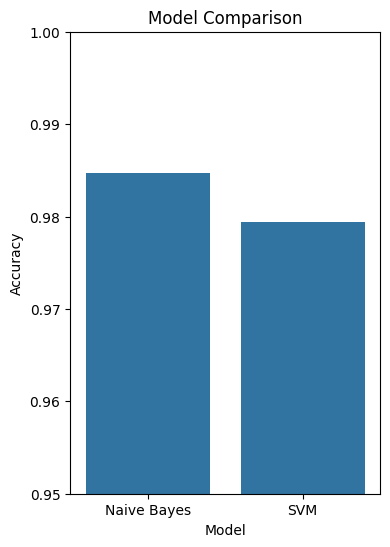

In [12]:
#Comparison Of Models
performance=pd.DataFrame({'Model':['Naive Bayes','SVM'],'Accuracy':[nb_accuracy,svm_accuracy]})

plt.figure(figsize=(4,6))
sns.barplot(x='Model',y='Accuracy',data=performance)
plt.title('Model Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0.95,1)
plt.show()

In [13]:
def checkSpam(mail):
  if nb_model.predict(mail):
    print("Spam according to Naive Bayes")
  else:
    print("Not Spam according to Naive Bayes")
  if svm_model.predict(mail):
    print("Spam according to SVM")
  else:
    print("Not Spam according to SVM")

In [14]:
email=[]
email.append(input("Enter email:"))
mail=cv.transform(email)
checkSpam(mail)


Enter email:I miss you,the kids miss you, please come back
Not Spam according to Naive Bayes
Not Spam according to SVM


In [15]:
email=[]
email.append(input("Enter email:"))
mail=cv.transform(email)
checkSpam(mail)

Enter email:I am John from bubuFactory you have won free prize. give us your credit card info to claim the prize
Spam according to Naive Bayes
Spam according to SVM


# **Saving and Loading Model**


In [18]:
import joblib

joblib.dump(nb_model,'Naive_Bayes_SpamPredictor')
joblib.dump(svm_model,'SVM_SpamPredictor')

['SVM_SpamPredictor']

In [27]:
def loadModels():
  svm_model_loaded=joblib.load('SVM_SpamPredictor')
  nb_model_loaded=joblib.load('Naive_Bayes_SpamPredictor')